# Analysis
- Baseline data, Random strategy, 10x (results_baseline.csv)
- 


In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('results_baseline.csv')
print(df.columns)

Index(['file_name', 'strategy', 'splits', 'backtracks', 'clauses', 'variables',
       'givens', 'unit_rule', 'pure_rule', 'execution_time'],
      dtype='object')


In [3]:
splits = df[df['file_name'].str.contains('top870.sdk.txt')]['splits']
backtracks = df[df['file_name'].str.contains('top870.sdk.txt')]['backtracks']
givens = df[df['file_name'].str.contains('top870.sdk.txt')]['givens']
unit_rule = df[df['file_name'].str.contains('top870.sdk.txt')]['unit_rule']
pure_rule = df[df['file_name'].str.contains('top870.sdk.txt')]['pure_rule']
pure_rule = df[df['file_name'].str.contains('top870.sdk.txt')]['pure_rule']

In [8]:
print(splits.mean(), splits.std(), splits.min(), splits.max())
print(backtracks.mean(), backtracks.std(), backtracks.min(), backtracks.max())
print(givens.mean(), givens.std())
print(unit_rule.mean(), unit_rule.std())
print(pure_rule.mean(), pure_rule.std())

66.33701149425288 112.01770275121004 1 2089
61.97551724137931 111.7824812566585 0 2086
22.836781609195402 2.1605900118578405
129.31252873563218 223.78582210608127
129.31252873563218 223.78582210608127


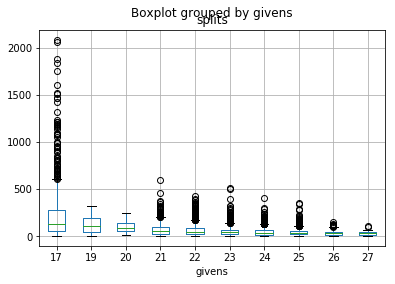

In [5]:
df.boxplot('splits', 'givens')

In [15]:
bins ={}
for item in splits:
    try:
        bins[int(item/20)] += []
    except:
        bins[int(item/20)] = 
print(bins)

{0: 2214, 1: 2071, 3: 943, 2: 1523, 6: 234, 7: 158, 5: 386, 14: 34, 11: 53, 8: 112, 4: 567, 9: 82, 10: 59, 12: 32, 13: 31, 20: 10, 19: 9, 75: 2, 80: 1, 23: 6, 41: 4, 30: 7, 27: 3, 16: 13, 17: 12, 24: 4, 35: 3, 44: 1, 26: 5, 21: 16, 37: 3, 53: 1, 59: 3, 18: 12, 28: 4, 65: 1, 29: 5, 15: 18, 47: 3, 22: 10, 25: 5, 46: 1, 58: 2, 32: 3, 56: 1, 49: 3, 92: 1, 34: 3, 61: 1, 94: 1, 33: 2, 31: 1, 52: 1, 104: 1, 60: 3, 87: 1, 40: 3, 103: 1, 54: 3, 38: 1, 71: 1, 42: 1, 73: 2, 45: 1, 36: 2}
